In [1]:
# Necessary packages
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data and merge
perfumes = pd.read_csv("data/1976_clean.csv")
perfume_embeddings = pd.read_csv("data/perfume_embedding_nn.csv")
df = pd.merge(perfume_embeddings, perfumes[['name','fragrance']], on='name', how='left')
df.head()

,name,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,fragrance
0,YSL MYSLF L’Absolu 极镜淡香精迷你瓶,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.941399,...,0.0,0.0,0.0,5.392220,0.0,0.0,0.0,0.0,0.0,木质调
1,Versace Eros Najim 凡赛斯爱神星渝男性香精,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,木质调
2,Messi 梅西同名男性淡香精,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.534760,...,0.0,0.0,0.0,9.338403,0.0,0.0,0.0,0.0,0.0,木质调
3,YSL MYSLF L’Absolu 极镜淡香精,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.941399,...,0.0,0.0,0.0,5.392220,0.0,0.0,0.0,0.0,0.0,木质调
4,Davidoff Essentials Blue 大卫杜夫蓝色境界男性淡香水,0.0,0.0,0.0,3.369769,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,清新调


In [3]:
# Split Information
item = df["name"].values
label = df["fragrance"].values
embeddings = df.drop(columns=["name", "fragrance"]).values

In [4]:
# Compute Similarity Matrix
similarity_matrix = cosine_similarity(embeddings)

In [5]:
# Separate similarities into same class and different class
same_class_sims = []
diff_class_sims = []

n = len(item)
for i in range(n):
    for j in range(i+1, n):
        sim = similarity_matrix[i, j]
        if label[i] == label[j]:
            same_class_sims.append(sim)
        else:
            diff_class_sims.append(sim)
            
print("Mean cosine similarity (same class):", np.mean(same_class_sims))
print("Mean cosine similarity (different class):", np.mean(diff_class_sims))

Mean cosine similarity (same class): 0.5535429398063512
Mean cosine similarity (different class): 0.3172904267939239


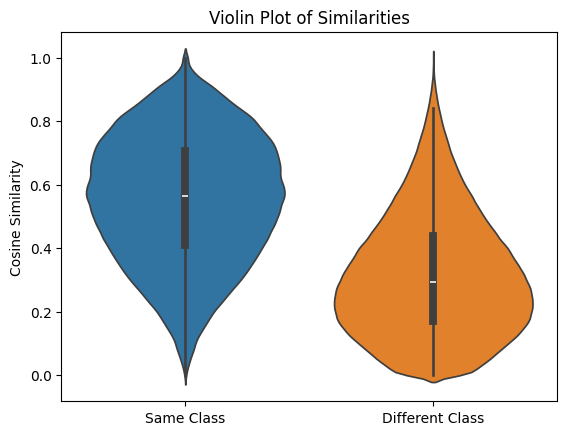

In [6]:
# Violin Plot
sns.violinplot(data=[same_class_sims, diff_class_sims])
plt.xticks([0,1], ["Same Class", "Different Class"])
plt.ylabel("Cosine Similarity")
plt.title("Violin Plot of Similarities")
plt.savefig("img/perfume_embedding_nn_evaluation_violin.png", dpi=300)
plt.show()

C:\Users\wilson\AppData\Local\Temp\ipykernel_26772\443708544.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(same_class_sims, label="Same Class", shade=True)
C:\Users\wilson\AppData\Local\Temp\ipykernel_26772\443708544.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diff_class_sims, label="Different Class", shade=True)


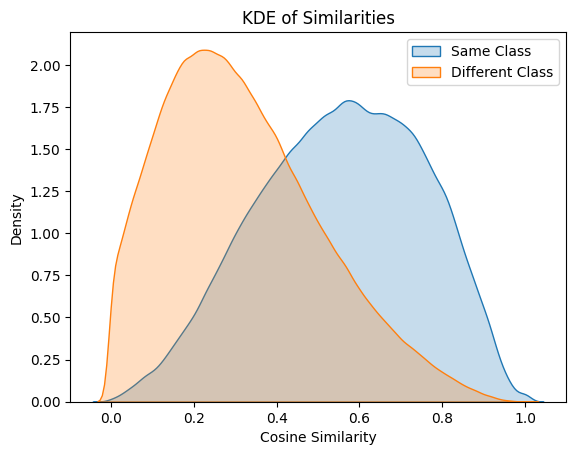

In [7]:
# KDE Plot
sns.kdeplot(same_class_sims, label="Same Class", shade=True)
sns.kdeplot(diff_class_sims, label="Different Class", shade=True)
plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
plt.title("KDE of Similarities")
plt.legend()
plt.savefig("img/perfume_embedding_nn_evaluation_KDE.png",dpi=300)
plt.show()